In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/final/geo_features_us_bank_final.csv")
df = df.dropna(subset=["latitude", "longitude", "total_deposits"])

In [3]:
def engineer_features(df):
    df = df.copy()
    df["log_deposits"] = np.log1p(df["total_deposits"])
    df["log_nearest_distance"] = np.log1p(df["nearest_competitor_distance_km"])
    df["density_ratio"] = df["total_deposits"] / (df["branch_density_10km"] + 1)
    df["lat_lon_interaction"] = df["latitude"] * df["longitude"]
    return df

df = engineer_features(df)

In [4]:
features = ["latitude", "longitude", "log_deposits", "log_nearest_distance", "branch_density_10km", "density_ratio", "lat_lon_interaction"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
model = IsolationForest(n_estimators=200, contamination=0.03, random_state=42)
df["anomaly"] = model.fit_predict(X_scaled)
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})


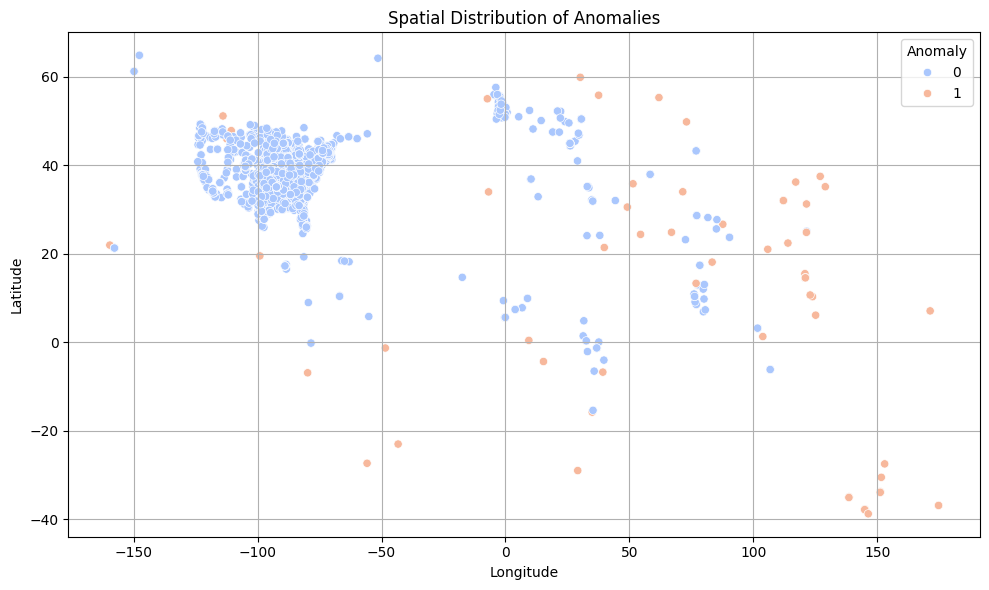

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="anomaly", palette="coolwarm")
plt.title("Spatial Distribution of Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend(title="Anomaly")
plt.tight_layout()
plt.show()

In [7]:
df.to_csv("../data/enriched/branches_with_anomaly_flag.csv", index=False)
print("✅ Anomaly detection completed and saved.")

✅ Anomaly detection completed and saved.
